In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("KAG_conversion_data.csv")

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


**Checking for null values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.shape

(1143, 11)

In [6]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

**Correlation Matrix**

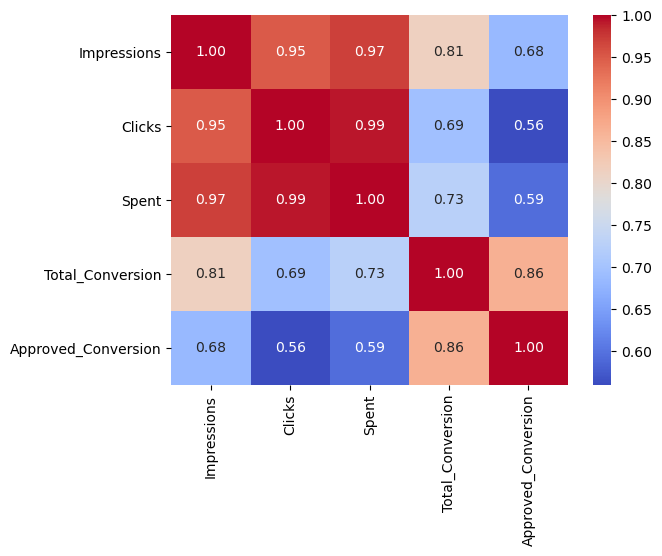

In [8]:
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

Here it's clear, "Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent". 

In [9]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178])

In [10]:
df["xyz_campaign_id"].replace({916:"campaign_a",936:"campaign_b",1178:"campaign_c"}, inplace=True)

In [11]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1


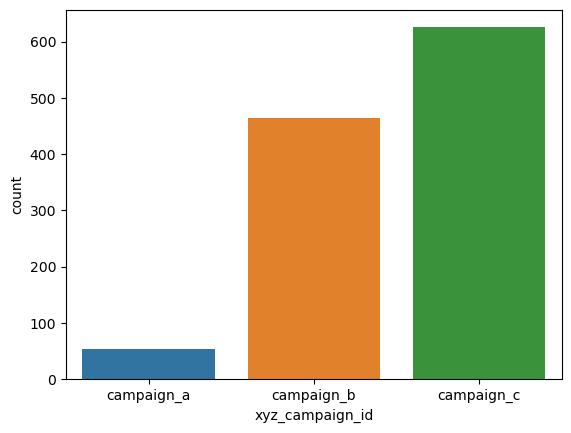

In [12]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
# Show the plot 
plt.show() 

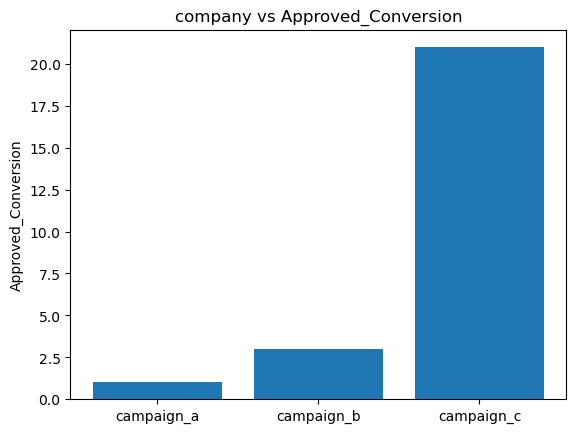

In [13]:
#Approved_Conversion
# Creating our bar plot
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

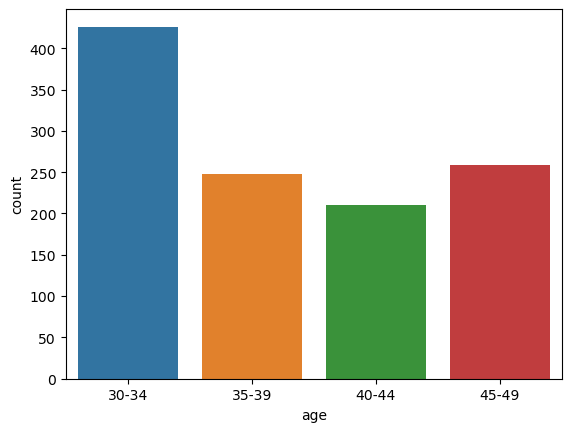

In [14]:
# count plot on single categorical variable 
sns.countplot(x ='age', data = df) 
# Show the plot 
plt.show() 

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

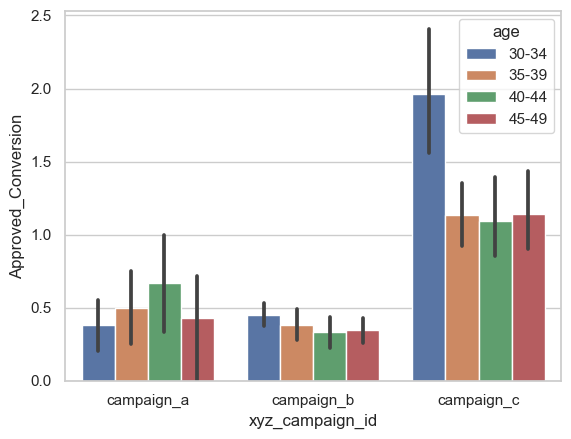

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)

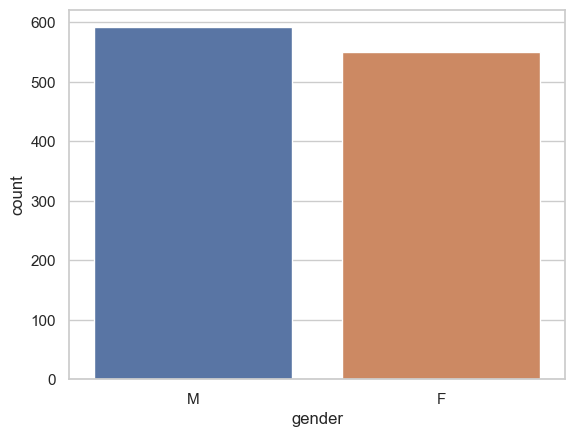

In [16]:
# count plot on single categorical variable 
sns.countplot(x ='gender', data = df) 
# Show the plot 
plt.show() 

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

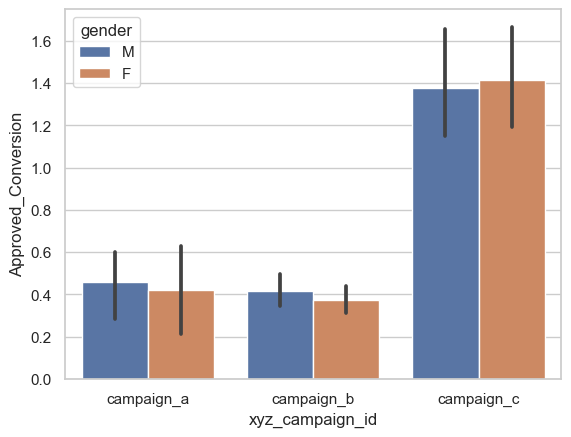

In [17]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=tips)

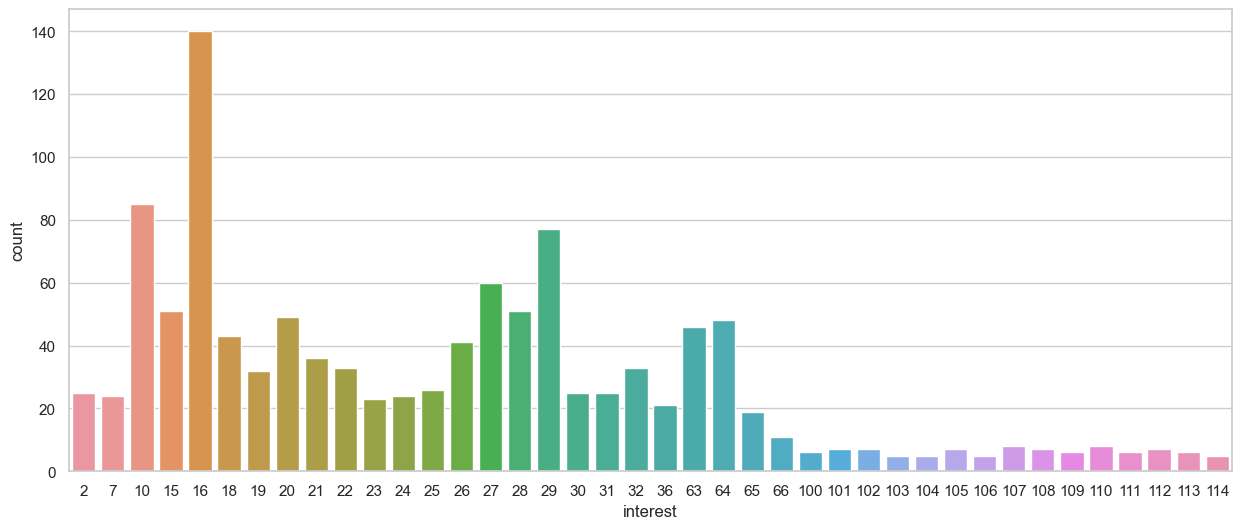

In [18]:
# count plot on single categorical variable 
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='interest', data = df) 
# Show the plot 
plt.show() 

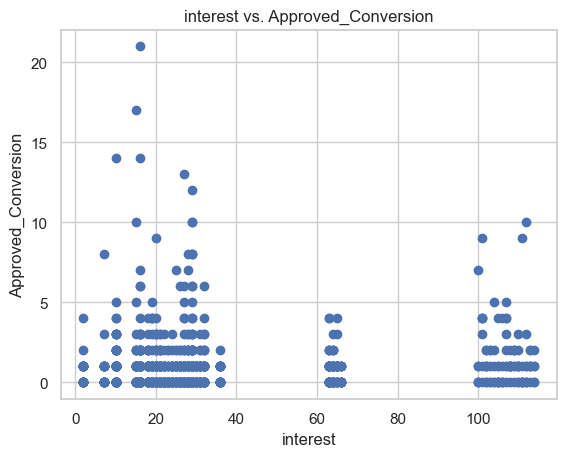

In [19]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

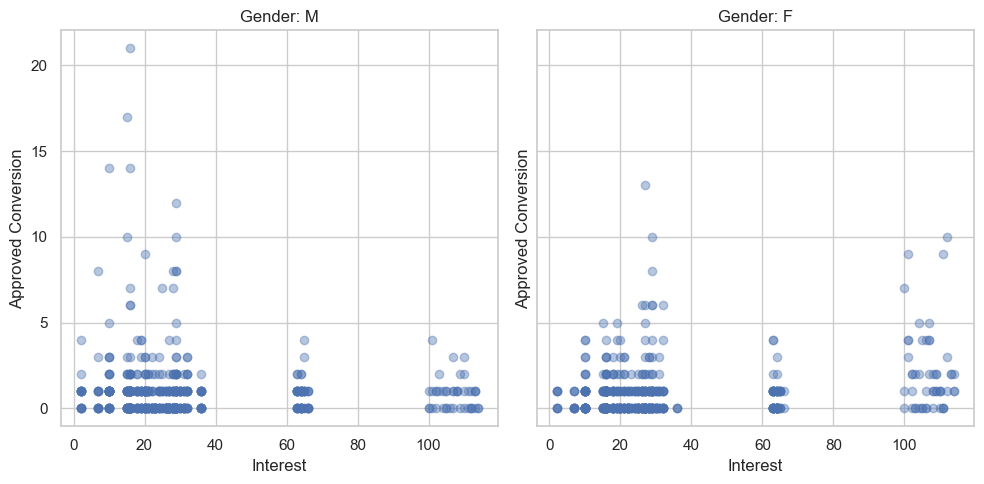

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined
unique_genders = df['gender'].unique()
num_cols = len(unique_genders)
fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5), sharey=True)

for ax, gender in zip(axes, unique_genders):
    subset = df[df['gender'] == gender]
    ax.scatter(subset['interest'], subset['Approved_Conversion'], alpha=0.4)
    ax.set_title(f'Gender: {gender}')
    ax.set_xlabel('Interest')
    ax.set_ylabel('Approved Conversion')

plt.tight_layout()
plt.show()


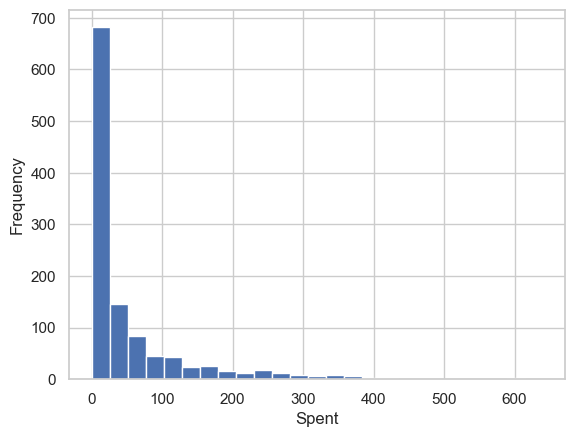

In [22]:
plt.hist(df['Spent'], bins = 25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

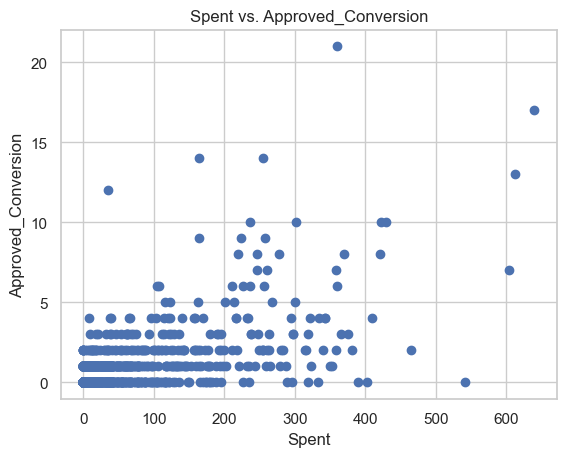

In [23]:
plt.scatter(df["Spent"], df["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

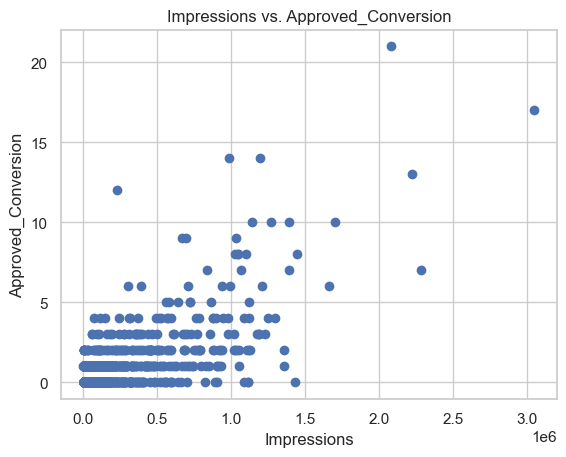

In [24]:
plt.scatter(df["Impressions"], df["Approved_Conversion"])
plt.title("Impressions vs. Approved_Conversion")
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")
plt.show()

In [27]:
a=[]
b=[]
c=[]
for i,j,k in zip(df.xyz_campaign_id, df.fb_campaign_id, df.Approved_Conversion):
    if i=="campaign_c":
      a.append(i),b.append(j),c.append(k)

In [28]:
d={'campaign_name':a, 'fb_campaign_id':b, 'Approved_Conversion':c}     
campaign_c=pd.DataFrame(d)
campaign_c.head()

,campaign_name,fb_campaign_id,Approved_Conversion
0,campaign_c,144531,14
1,campaign_c,144531,5
2,campaign_c,144531,1
3,campaign_c,144531,2
4,campaign_c,144531,2


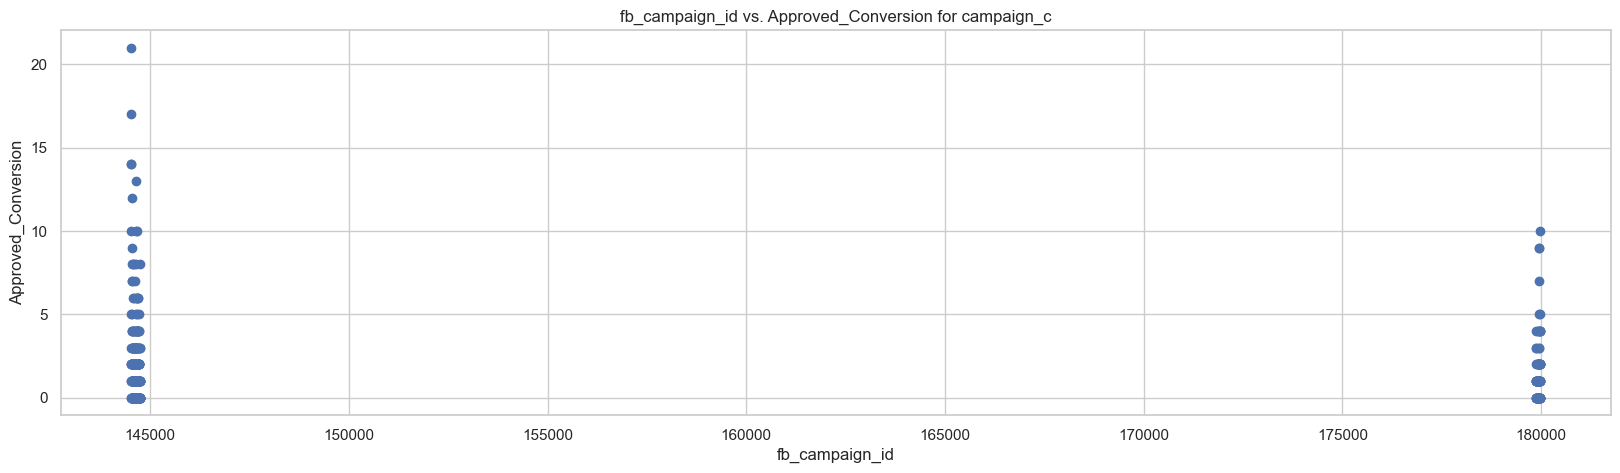

In [29]:
plt.figure(figsize=(20,5))
plt.scatter(campaign_c["fb_campaign_id"], campaign_c["Approved_Conversion"])
plt.title("fb_campaign_id vs. Approved_Conversion for campaign_c")
plt.xlabel("fb_campaign_id")
plt.ylabel("Approved_Conversion")
plt.show()

In [30]:
df["xyz_campaign_id"].replace({"campaign_a":916 ,"campaign_b":936 ,"campaign_c":1178}, inplace=True)

In [31]:
#encoding gender
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df["gender"])
df["gender"]=encoder.transform(df["gender"])
print(df["gender"])

0       1
1       1
2       1
3       1
4       1
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: gender, Length: 1143, dtype: int64


In [32]:
#encoding age
encoder.fit(df["age"])
df["age"]=encoder.transform(df["age"])
print(df["age"])

0       0
1       0
2       0
3       0
4       0
       ..
1138    3
1139    3
1140    3
1141    3
1142    3
Name: age, Length: 1143, dtype: int64


In [33]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0,1,15,7350,1,1.43,2,1
1,708749,916,103917,0,1,16,17861,2,1.82,2,0
2,708771,916,103920,0,1,20,693,0,0.00,1,0
3,708815,916,103928,0,1,28,4259,1,1.25,1,0
4,708818,916,103928,0,1,28,4133,1,1.29,1,1


In [34]:
x=np.array(df.drop(labels=["Approved_Conversion","Total_Conversion"], axis=1))
y=np.array(df["Total_Conversion"])

In [35]:
x

array([[7.08746000e+05, 9.16000000e+02, 1.03916000e+05, ...,
        7.35000000e+03, 1.00000000e+00, 1.42999995e+00],
       [7.08749000e+05, 9.16000000e+02, 1.03917000e+05, ...,
        1.78610000e+04, 2.00000000e+00, 1.82000002e+00],
       [7.08771000e+05, 9.16000000e+02, 1.03920000e+05, ...,
        6.93000000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.31441200e+06, 1.17800000e+03, 1.79979000e+05, ...,
        1.51531000e+05, 2.80000000e+01, 4.02899995e+01],
       [1.31441400e+06, 1.17800000e+03, 1.79981000e+05, ...,
        7.90253000e+05, 1.35000000e+02, 1.98710001e+02],
       [1.31441500e+06, 1.17800000e+03, 1.79982000e+05, ...,
        5.13161000e+05, 1.14000000e+02, 1.65609999e+02]])

In [36]:
y

array([2, 2, 1, ..., 2, 8, 5])

In [37]:
y=y.reshape(len(y),1)
y

array([[2],
       [2],
       [1],
       ...,
       [2],
       [8],
       [5]])

In [38]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x = sc_x.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(x_train, y_train)

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [41]:
y_pred=rfr.predict(x_test)
y_pred=np.round(y_pred)

In [42]:
y_pred

array([ 1.,  3.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,  9.,  2.,
        2.,  3.,  1.,  1.,  2.,  1.,  2., 18.,  3.,  1.,  3.,  1.,  1.,
        2.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  2.,
        1.,  1.,  1.,  1.,  2.,  8.,  1.,  1.,  2.,  1., 13.,  4.,  1.,
        1.,  3.,  2.,  1.,  4.,  4.,  2.,  2.,  1.,  4.,  1.,  1.,  3.,
        1.,  1.,  4.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,  1.,
        1.,  1.,  2.,  2.,  1.,  4.,  1.,  2., 11.,  2., 26.,  1.,  1.,
        2.,  4.,  3.,  1.,  1.,  7.,  2.,  1.,  1.,  4.,  2.,  1.,  2.,
        1.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  2.,  1.,  4.,  1.,  1.,  1., 16.,  7.,  2.,  1.,  5.,  1.,
        2.,  1.,  3.,  1.,  1.,  1.,  2.,  1.,  2.,  9.,  1.,  1.,  1.,
        2.,  1.,  2.,  1.,  2.,  2.,  3.,  1.,  1.,  1.,  1.,  1., 22.,
        4.,  3.,  3.,  3.,  1.,  3.,  1.,  1.,  1.,  6.,  2.,  3.,  1.,
        1.,  3., 22.,  6.,  6.,  1.,  2.,  1.,  1.,  1., 11.,  1

# **Evaluation**

In [43]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)


In [44]:
mae

0.9912663755458515

In [45]:
#R-squred value
r2_score

0.7530816415210646